<a href="https://colab.research.google.com/github/ArchieFauzan/Pemrograman-python-semester-3/blob/main/tugas%20p11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TugasPertemuan 11

/content/drive/MyDrive/TugasPertemuan 11


In [ ]:
ls

Data/


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
print("Please Wait....")
imagePaths = paths.list_images("Data")
data = []
labels = []

Please Wait....


In [ ]:
for gambar in imagePaths:
  image = Image.open(gambar)
  image = np.array(image.resize((128, 128))) /255.0
  data.append(image)

  label = gambar.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
(traina, testa, trainb, testb) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(traina.shape)
print(testa.shape)

(444, 128, 128, 3)
(149, 128, 128, 3)


In [ ]:
  from keras.models import Sequential
  from keras.layers.core import Flatten, Dense
  from keras.layers import Convolution2D, MaxPooling2D
  
  model = Sequential()
  model.add(Convolution2D(256, 3, 3, activation="relu", input_shape=(128, 128, 3)))
  model.add(MaxPooling2D(2,2))
  model.add(Convolution2D(64, 3, 3, activation="relu"))
  model.add(MaxPooling2D(2, 2))

  model.add (Flatten())
  model.add(Dense(144, activation="relu", name="1st"))
  model.add(Dense(144, activation="relu", name="2nd"))
  model.add(Dense(64, activation="relu", name="3rd"))
  model.add(Dense(64, activation="relu", name="4th"))
  model.add(Dense(32, activation="relu", name="5th"))
  model.add(Dense(5, activation = "softmax", name="6th"))
  

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 42, 42, 256)       7168      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 21, 21, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 64)          147520    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 576)               0         
_________________________________________________________________
1st (Dense)                  (None, 144)               83088     
_________________________________________________________________
2nd (Dense)                  (None, 144)             

In [ ]:
print("Training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(traina, trainb, validation_data=(testa, testb), epochs=200, batch_size=32)

Training network...
Epoch 1/200
14/14 [==============================] - 3s 219ms/step - loss: 1.6126 - accuracy: 0.1734 - val_loss: 1.6193 - val_accuracy: 0.1611
Epoch 2/200
14/14 [==============================] - 3s 198ms/step - loss: 1.6092 - accuracy: 0.2072 - val_loss: 1.6127 - val_accuracy: 0.1611
Epoch 3/200
14/14 [==============================] - 3s 194ms/step - loss: 1.6057 - accuracy: 0.2140 - val_loss: 1.6236 - val_accuracy: 0.1611
Epoch 4/200
14/14 [==============================] - 3s 187ms/step - loss: 1.5955 - accuracy: 0.2207 - val_loss: 1.6199 - val_accuracy: 0.1812
Epoch 5/200
14/14 [==============================] - 3s 206ms/step - loss: 1.5748 - accuracy: 0.3041 - val_loss: 1.5961 - val_accuracy: 0.1946
Epoch 6/200
14/14 [==============================] - 3s 208ms/step - loss: 1.4819 - accuracy: 0.3739 - val_loss: 1.4767 - val_accuracy: 0.3624
Epoch 7/200
14/14 [==============================] - 3s 190ms/step - loss: 1.4496 - accuracy: 0.3671 - val_loss: 1.4609 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


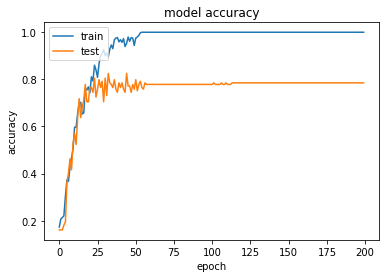

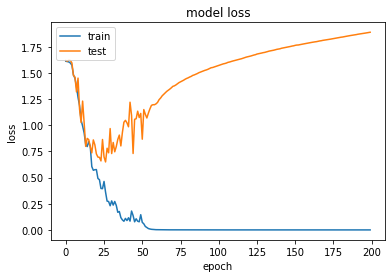

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("Evaluating network...")
predictions = model.predict(testa, batch_size=32)
print(classification_report(testb.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))

Evaluating network...
              precision    recall  f1-score   support

      GMB_03       0.87      0.82      0.84        33
      GMB_04       0.75      0.75      0.75        28
      GMB_05       0.89      0.87      0.88        38
      GMB_06       0.55      0.71      0.62        24
      GMB_08       0.86      0.73      0.79        26

    accuracy                           0.79       149
   macro avg       0.78      0.78      0.78       149
weighted avg       0.80      0.79      0.79       149

